***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility Space](4_0_introduction.ipynb)
    * Previous: [4.4 The Visibility Function](4_4_the_visibility_function.ipynb)
    * Next: [4.5.2 UV Coverage: Improving Your Coverage](4_5_2_uv_coverage_improving_your_coverage.ipynb)

***

Import standard modules:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import plotBL

In [35]:
HTML('../style/code_toggle.html')

### 4.5.1 UV coverage : UV tracks

[$\S$ 4.5.1 &#10549;](4_5_1_uv_coverage_uv_tracks.ipynb) 和 [$\S$ 4.5.2 &#10142;](4_5_2_uv_coverage_improving_your_coverage.ipynb)将简单介绍“孔径合成”。通过对可见度函数的采样$\mathcal{V}$，干涉仪获得了天空的傅立叶变换的系数。可见度函数采样属于($u$, $v$, $w$)三维空间，通过简化处理，被投影到$uv$平面。在  [$\S$ 4.5.1 &#10549;](4_5_1_uv_coverage_uv_tracks.ipynb)，我们重点关注可见度函数的采样方法，它是干涉仪布局、源的方向以及观测时间的函数。在 [$\S$ 4.5.2 &#10142;](4_5_2_uv_coverage_improving_your_coverage.ipynb)，我们将讨论提高采样率的技术跟方法。

The objective of [$\S$ 4.5.1 &#10549;](4_5_1_uv_coverage_uv_tracks.ipynb) and [$\S$ 4.5.2 &#10142;](4_5_2_uv_coverage_improving_your_coverage.ipynb) is to give you a glimpse into the process of *aperture synthesis*. <span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span> An interferometer measures components of the Fourier Transform of the sky by sampling the visibility function, $\mathcal{V}$. This collection of samples lives in ($u$, $v$, $w$) space, and are often projected onto the so-called $uv$-plane.
In [$\S$ 4.5.1 &#10549;](4_5_1_uv_coverage_uv_tracks.ipynb), we will focus on the way the visibility function is sampled. This sampling is a function of the interferometer's configuration, the direction of the source and the observation time.
In [$\S$ 4.5.2 &#10142;](4_5_2_uv_coverage_improving_your_coverage.ipynb), we will see how this sampling can be improved by using certain observing techniques.

#### 4.5.1.1 随时间变化的投影基线：$uv$轨迹 The projected baseline with time: the $uv$ track

从源的角度看物理基线，我们得到投影基线，基线的位置、天空中的观测方向共同决定了一条投影基线。投影基线确定了所测天空的空间频率，由于地球的自传，投影基线和相应的空间频率（由基线的($u$, $v$)坐标决定）随着时间缓慢变化，在$uv$平面上产生一条路径。

A projected baseline depends on a baseline's coordinates, and the direction being observed in the sky. It corresponds to the baseline as seen from the source. The projected baseline is what determines the spatial frequency of the sky that the baseline will measure. As the Earth rotates, the projected baseline and its corresponding spatial frequency (defined by the baseline's ($u$, $v$)-coordinates) vary slowly in time, generating a path in the $uv$-plane.

接下来我们将生成测试用例，以查看路径的轨迹，以及如何根据基线的几何形状对轨迹进行预测。

We will now generate test cases to see what locus the path takes, and how it can be predicted depending on the baseline's geometry.

##### 4.5.1.1.1 从源的角度看投影基线 Baseline projection as seen from the source

两个天线Ant$_1$ 和 Ant$_2$ 构成一条基线。

Let's generate one baseline from two antennas Ant$_1$ and Ant$_2$.

In [36]:
ant1 = np.array([-500e3,500e3,0])   # in m
ant2 = np.array([500e3,-500e3,+10]) # in m


用ENU坐标系表示物理基线。

Let's express the corresponding physical baseline in ENU coordinates.

In [37]:
b_ENU = ant2-ant1                # baseline 
D = np.sqrt(np.sum((b_ENU)**2))  # |b|
print(str(D/1000)+" km")


1414.2135624084503 km


干涉仪所在的纬度为 $L_a=+45^\circ00'00''$

Let's place the interferometer at a latitude $L_a=+45^\circ00'00''$.

In [7]:
L = (np.pi/180)*(45+0./60+0./3600)      # Latitude in radians

In [38]:
A = np.arctan2(b_ENU[0],b_ENU[1])
print("Baseline Azimuth="+str(np.degrees(A))+"°")

E = np.arcsin(b_ENU[2]/D)
print("Baseline Elevation="+str(np.degrees(E))+"°")

Baseline Azimuth=135.0°
Baseline Elevation=0.0004051423422639454°


<IPython.core.display.Javascript object>


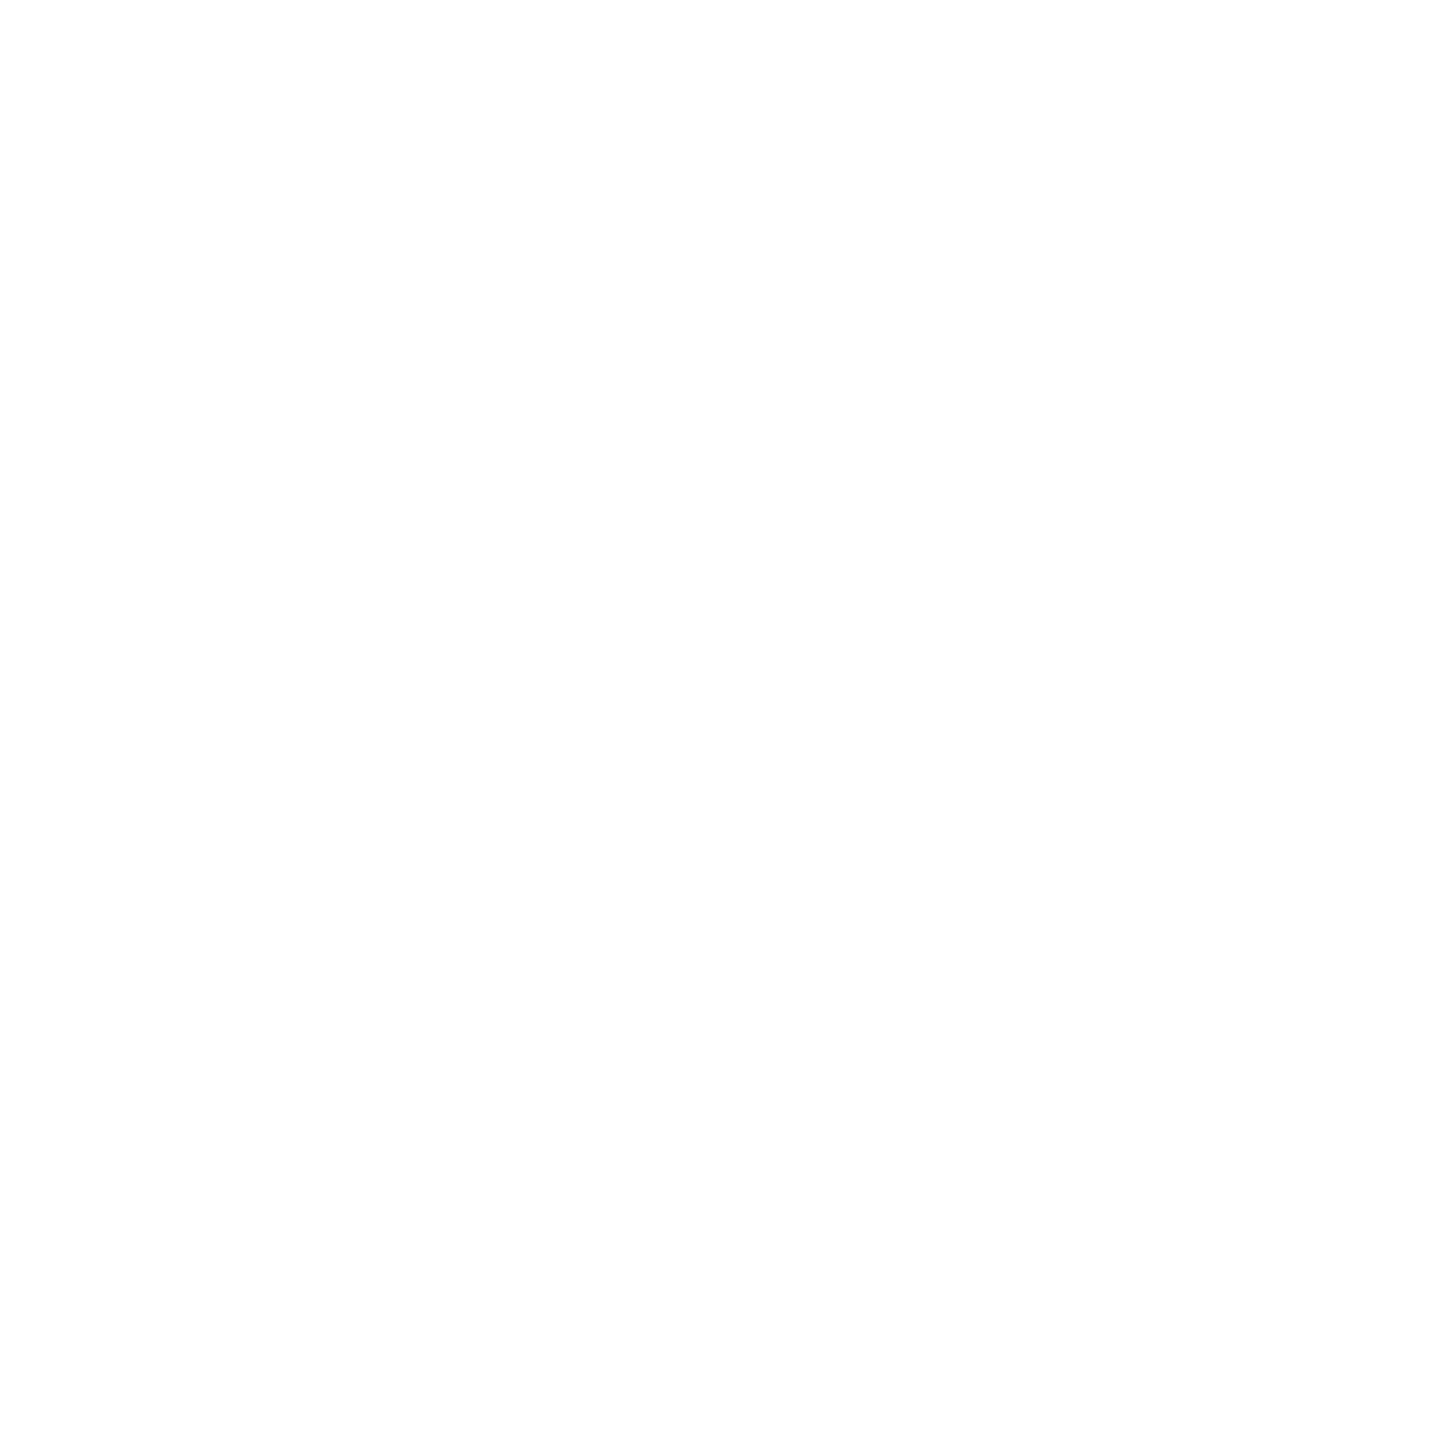

<IPython.core.display.Javascript object>


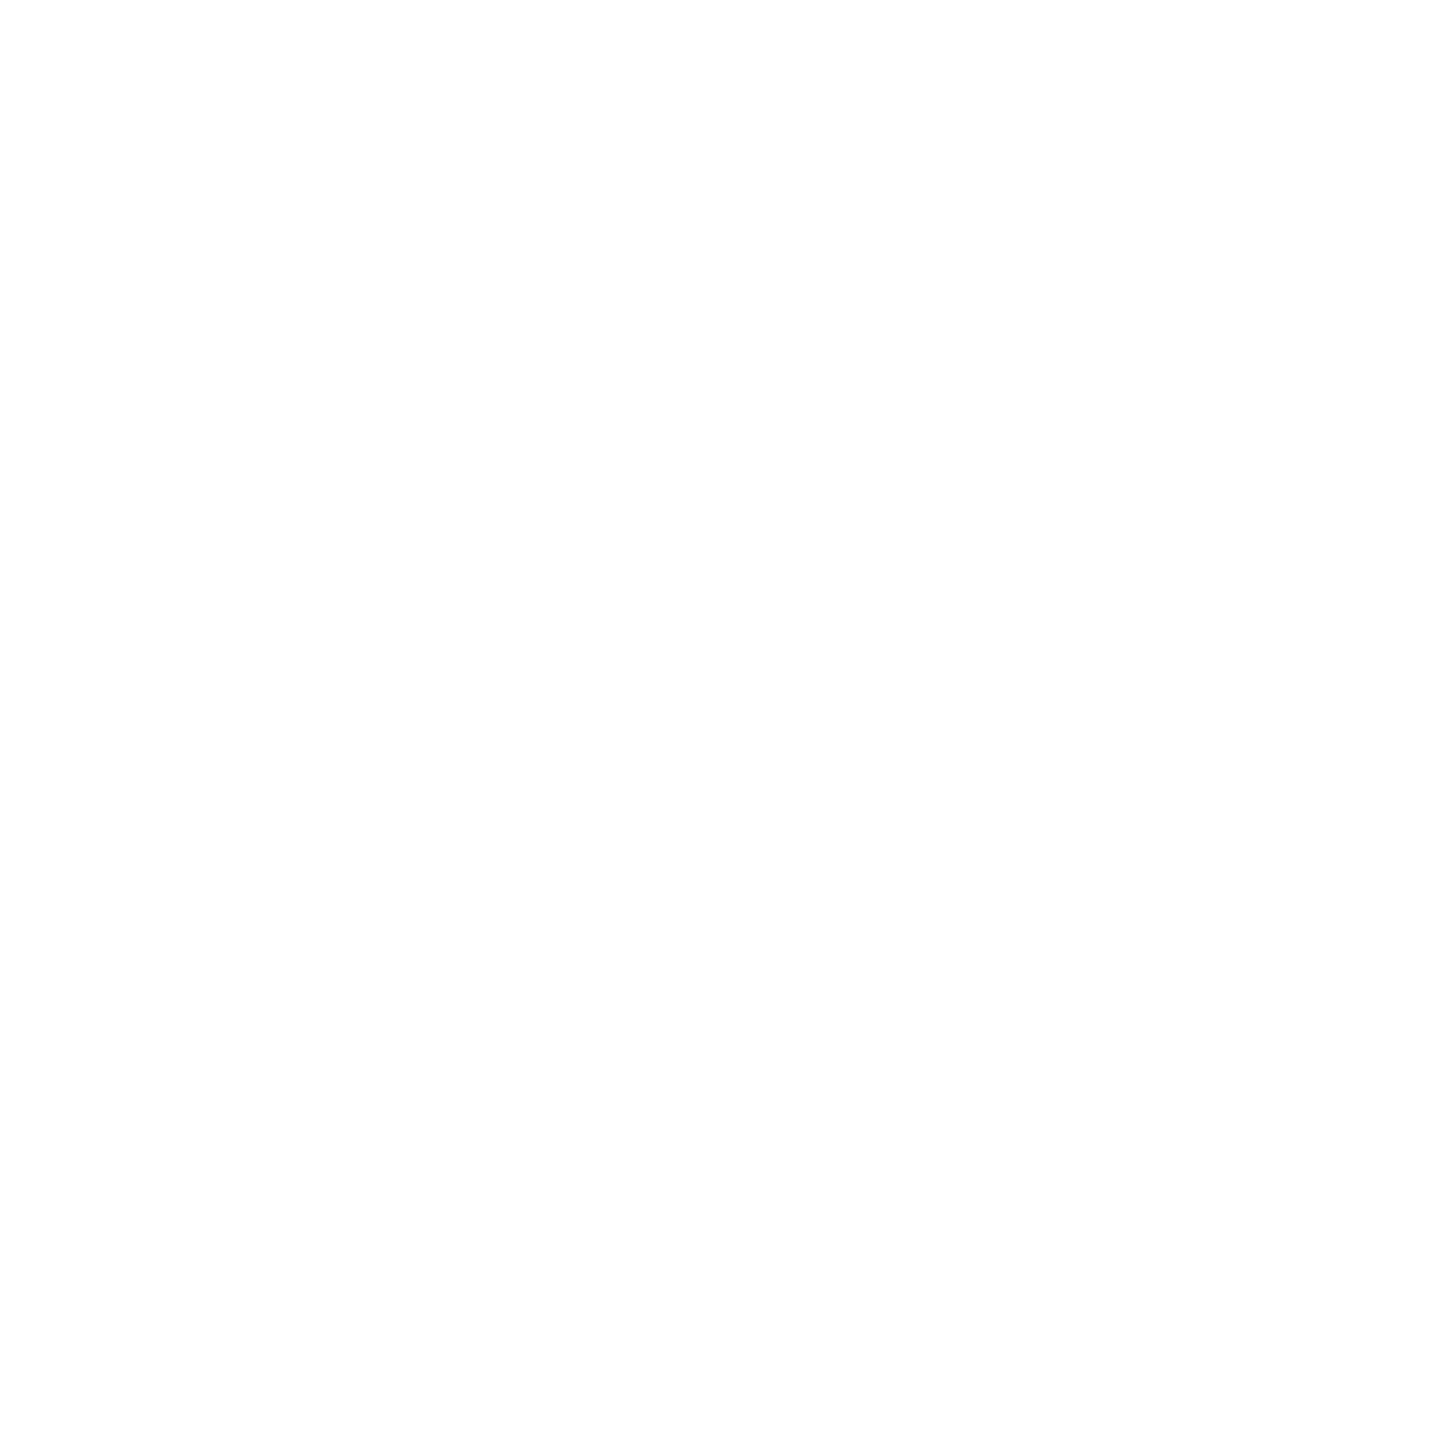

In [32]:
%matplotlib nbagg
plotBL.sphere(ant1,ant2,A,E,D,L)

**Figure 4.5.1**: 从天空看位于+45$^\circ$纬度位置的基线。该图有交互功能，可以在3D空间转动，调整物理基线和源的相对位置，可以看到不同的基线投影。A baseline located at +45$^\circ$ as seen from the sky. This plot is interactive and can be rotated in 3D to see different baseline projections, depending on the position of the source w.r.t. the physical baseline.

通过上图，我们展示了一条位于纬度+45$^\circ$的基线。在天空参考系下，它沿着本地的南-西/北-东轴。西向转动球体，能模拟出由源在天球上的视运动所带来的投影基线的变化。

On the interactive plot above, we represent a baseline located at +45$^\circ$. It is aligned with the local south-west/north-east axis, as seen from the sky frame of reference. By rotating the sphere westward, you can simulate the variation of the projected baseline as seen from a source in apparent motion on the celestial sphere.

##### 4.5.1.1.2 在 ($u$,$v$,$w$)平面上的基线坐标  Coordinates of the baseline in the ($u$,$v$,$w$) plane

下面通过一次模拟观测来研究投影基线随着时间的变化。基线的纬度设置为南非的纬度，首先根据空中的源表示出物理基线的(X,Y,Z)坐标，然后转换到(u,v,w)坐标系。

We will now simulate an observation to study how a projected baseline will change with time. We will position this baseline at a South African latitude. We first need the expression of the physical baseline in a convenient reference frame, attached to the source in the sky.

通过公式[$\S$ 4.2 &#10142;](4_2_the_baseline_and_its_representation_in_space.ipynb)，建立基线的赤道坐标与($u$,$v$,$w$)坐标之间的联系：

In [$\S$ 4.2 &#10142;](4_2_the_baseline_and_its_representation_in_space.ipynb), we linked the equatorial coordinates of the baseline to the ($u$,$v$,$w$) coordinates through the transformation matrix:
\begin{equation}
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
=
\frac{1}{\lambda}
\begin{pmatrix}
\sin H_0 & \cos H_0 & 0\\ 
-\sin \delta_0 \cos H_0 & \sin\delta_0\sin H_0 & \cos\delta_0\\
\cos \delta_0 \cos H_0 & -\cos\delta_0\sin H_0 & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
X\\
Y\\
Z
\end{pmatrix}
\end{equation}

<a id="vis:eq:451"></a> <!---\label{vis:eq:451}--->
\begin{equation}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=|\mathbf{b}|
\begin{bmatrix}
\cos L_a \sin \mathcal{E} - \sin L_a \cos \mathcal{E} \cos \mathcal{A}\nonumber\\ 
\cos \mathcal{E} \sin \mathcal{A} \nonumber\\
\sin L_a \sin \mathcal{E} + \cos L_a \cos \mathcal{E} \cos \mathcal{A}\\
\end{bmatrix}
\end{equation}


**Equation 4.5.1** 

其中$\mathbf{b}$是一个$\mathcal{A}$,$\mathcal{E}$的函数，因此在赤道坐标里是($X$,$Y$,$Z$)的函数。

This expression of $\mathbf{b}$ is a function of ($\mathcal{A}$,$\mathcal{E}$), and therefore of ($X$,$Y$,$Z$) in the equatorial frame of reference.

##### 4.5.1.1.2 观测参数 Observation parameters

让我们任意设定一组观测参数，来模拟一次真实的观测。

Let's define an arbitrary set of observation parameters to mimic a real observation.

* 基线纬度 Latitude of the baseline: $L_a=-30^\circ43'17.34''$
* 观测赤纬 Declination of the observation: $\delta=-74^\circ39'37.481''$
* 观测时窗 Duration of the observation: $\Delta \text{HA}=[-4^\text{h},4^\text{h}]$
* 步长 Time steps: 600
* 频率 Frequency: 1420 MHz <font color=red> 后面的代码里的频率赋值有问题f = 1420e9,为了修正这问题，后面在算uvw的时候，不得不多处以了一个1e3.。。。。。。 </font>

In [39]:
# Observation parameters
c = 3e8                                        # Speed of light
f = 1420e6                                   # Frequency 
lam = c/f                                      # Wavelength 
#dec = (np.pi/180)*(-30-43.0/60-17.34/3600)     # Declination 
dec = (np.pi/180)*(-74-39.0/60-37.481/3600)

print('dec=',dec)


time_steps = 600                               # Time Steps
h = np.linspace(-4,4,num=time_steps)*np.pi/12  # Hour angle window

dec= -1.3030699996295836


##### 4.5.1.1.3 计算($u$,$v$,$w$)坐标系下的投影基线Computing of the projected baselines in ($u$,$v$,$w$) coordinates as a function of time

采用上面的矩阵运算来进行基线的坐标系变换。

As seen previously, we convert the baseline coordinates using the previous matrix transformation.

In [40]:
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
L = (np.pi/180)*(-30-43.0/60-17.34/3600)

A=np.arctan2(b_ENU[0],b_ENU[1])
print("Azimuth=",A*(180/np.pi))
E=np.arcsin(b_ENU[2]/D)
print("Elevation=",E*(180/np.pi))

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))
print("X=",X)
print("Y=",Y)
print("Z=",Z)

Azimuth= 61.44554659579179
Elevation= -0.20921355557331217
X= 17.889978014530715
Y= 65.189
Z= 30.634910684374574


因为$u$, $v$, $w$坐标跟时角$H$有关，所以我们必须计算每次观测的时角。使用在 [$\S$ 4.2.2 &#10142;](4_2_the_baseline_and_its_representation_in_space.ipynb#)给出的以下公式：

As the $u$, $v$, $w$ coordinates explicitly depend on $H$, we must evaluate them for each observational time step. We will use the equations defined in [$\S$ 4.2.2 &#10142;](4_2_the_baseline_and_its_representation_in_space.ipynb#):

* $\lambda u = X \sin H + Y \cos H$
* $\lambda v= -X \sin \delta \cos H + Y \sin\delta\sin H + Z \cos\delta$
* $\lambda w= X \cos \delta \cos H -Y \cos\delta\sin H + Z \sin\delta$

In [41]:
u = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)
v = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)
w = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)


现在，我们已经描述出了基线的uvw轨迹（8小时观测），然而，仅仅根据上面的三个数学公式，我们依然难以追踪到uvw的轨迹，所以，我们画出了它的uvw空间及其在uv平面上的投影。

We now have everything that describes the $uvw$-track of the baseline (over an 8-hour observational period). It is hard to predict which locus the $uvw$ track traverses given only the three mathematical equations from above. Let's plot it in $uvw$ space and its projection in $uv$ space.

<IPython.core.display.Javascript object>


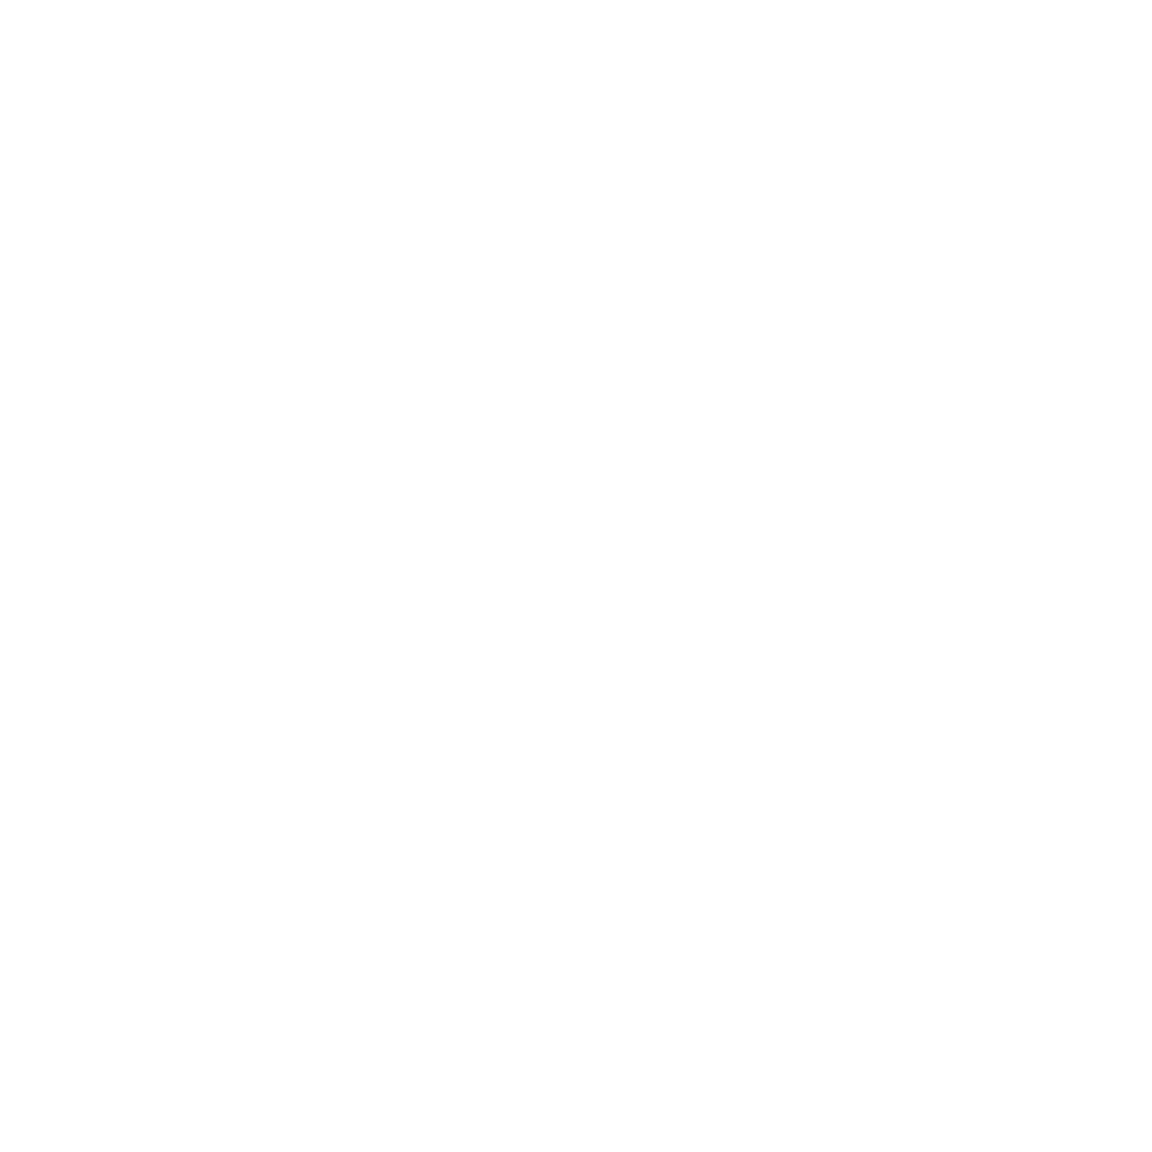

<IPython.core.display.Javascript object>


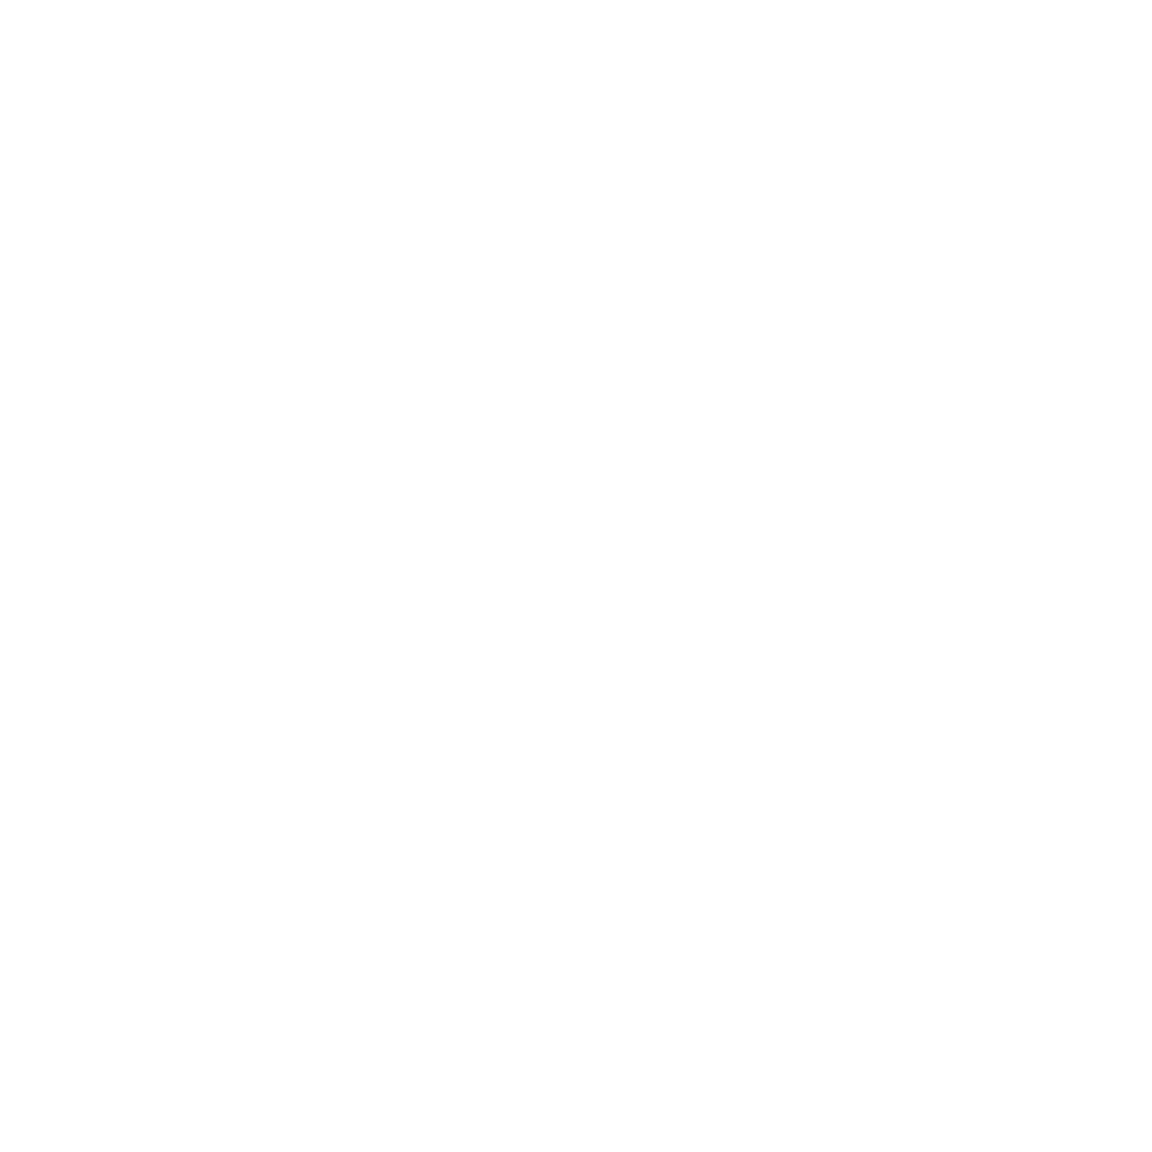

In [42]:
%matplotlib nbagg
plotBL.UV(u,v,w)

**Figure 4.5.2**: uvw轨迹的模拟及其在uv平面上的投影。$uvw$ track derived from the simulation and projection in the $uv$-plane.

由上图可以看出，在$uvw$空间里，基线轨迹为两条曲线，在$uv$平面上，基线的投影轨迹为两个弧段。我们现在只关注$uv$平面上的投影轨迹。为了获得跟观测无关的轨迹信息，我们把上述包括$u$、$v$、$w$的三个式子进行合并，从而消除公式中的$H$项。最后，我们通过以下公式，把$u$、$v$、$X$、$Y$联系在一起（完整推导过程见 [$\S$ A.3 &#10142;](../0_Introduction/2_Appendix.ipynb))：

The track in $uvw$ space are curves and the projection in the $uv$ plane are arcs. Let us focus on the track's projection in this plane. To get observation-independent knowledge of the track we can try to combine the three equations of $u$, $v$ and $w$, the aim being to eliminate $H$ from the equation. We end up with an equation linking $u$, $v$, $X$ and $Y$ (the full derivation can be found in [$\S$ A.3 &#10142;](../0_Introduction/2_Appendix.ipynb)):

$$\boxed{u^2 + \left[ \frac{v -\frac{Z}{\lambda} \cos \delta}{\sin \delta} \right]^2 = \left[ \frac{X}{\lambda} \right]^2 + \left[ \frac{Y}{\lambda} \right]^2}$$

可以看出，此时的$uv$轨迹为椭圆形。

One can note that in this particular case, the $uv$ track takes on the form of an *ellipse*.

<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

在($u$,$v$)平面上，该椭圆的中心位于$(0,\frac{Z}{\lambda} \cos \delta)$。

This ellipse is centered at $(0,\frac{Z}{\lambda} \cos \delta)$ in the ($u$,$v$) plane.

长轴$a=\frac{\sqrt{X^2 + Y^2}}{\lambda}$。

The major axis is  $a=\frac{\sqrt{X^2 + Y^2}}{\lambda}$.

根据$Z$、 $\delta$ 以及 $a$可以算出短轴（沿着$v$轴方向）。根据计算得到的长短轴画出该理论上的椭圆，可以看出，模拟观测的轨迹完美地落在该椭圆上。

The minor axis (along the axis $v$) will be a function of $Z$, $\delta$ and $a$.
We can check this by plotting the theoretical ellipse over the observed portion of the track. (You can fall back to the duration of the observation to see that the track is mapping this ellipse exactly).

Z= 30.634910684374574


/Users/denghui/Documents/Work/DEV/fundamentals_of_interferometry_chinese/4_Visibility_Space/plotBL.py:132: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold('on')


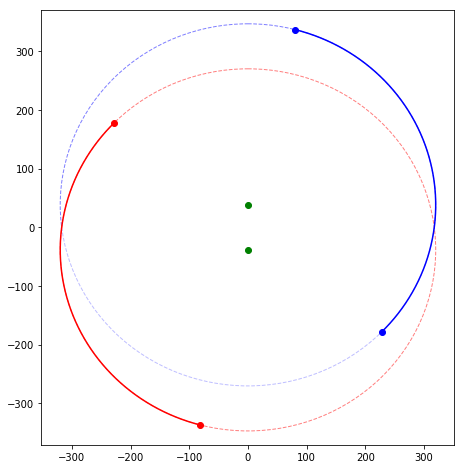

In [43]:
%matplotlib inline
from matplotlib.patches import Ellipse

# parameters of the UVtrack as an ellipse
a=np.sqrt(X**2+Y**2)/lam # major axis  
b=a*np.sin(dec)              # minor axis
v0=Z/lam*np.cos(dec)     # center of ellipse

print("Z=",Z)

plotBL.UVellipse(u,v,w,a,b,v0)

**Figure 4.5.3**: 蓝色对应基线$\mathbf{b}_{12}$的$uv$轨迹，红色对应基线$\mathbf{b}_{21}$的$uv$轨迹。因为$I_\nu$是实数，可见度 $\mathcal{V}$的实部为偶函数，虚部为奇函数，则$\mathcal{V}(-u,-v)=\mathcal{V}^*$ ，因此，一条基线提供了一个可见度以及它在($-u$,$-v$)位置处的复共轭可见度。  The blue (resp. the red) curve is the $uv$ track of the baseline $\mathbf{b}_{12}$ (resp. $\mathbf{b}_{21}$). As $I_\nu$ is real, the real part of the visibility $\mathcal{V}$ is even and the imaginary part is odd making $\mathcal{V}(-u,-v)=\mathcal{V}^*$. It implies that one baseline automatically provides a measurement of a visibility and its complex conjugate at ($-u$,$-v$).

#### 4.5.1.2 特例 Special cases

##### 4.5.1.2.1 极地干涉仪 The Polar interferometer

让我们在北极安装一条基线，当地的天顶指向北天极NCP，$\delta=90^\circ$。从北天极往下看，基线将随着地球自转，投影基线就是物理基线，只有在极地才会这样。

Let settle one baseline at the North pole. The local zenith corresponds to the North Celestial Pole (NCP) at $\delta=90^\circ$. As seen from the NCP, the baseline will rotate and the projected baseline will correspond to the physical baseline. This configuration is the only case where this happens.

如果$\mathbf{b}$在转，我们能由此猜测$uv$的轨迹将正好是一个圆。让我们验证一下：

If $\mathbf{b}$ rotates, we can guess that the $uv$ tracks will be perfect circles. Let's check:

In [44]:
L=np.radians(90.)
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))

A=np.arctan2(b_ENU[0],b_ENU[1])
print("Azimuth=",A*(180/np.pi))
E=np.arcsin(b_ENU[2]/D)
print("Elevation=",E*(180/np.pi))

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))
print("X=",X)
print("Y=",Y)
print("Z=",Z)

Azimuth= 61.44554659579179
Elevation= -0.20921355557331217
X= -35.475
Y= 65.189
Z= -0.27099999999999785


让我们计算对北天极NCP($\delta=90^\circ$)进行观测的$uv$轨迹：

Let's compute the $uv$ tracks of an observation of the NCP ($\delta=90^\circ$):

In [45]:
dec=np.radians(90.)

uNCP = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)
vNCP = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)
wNCP = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)

# parameters of the UVtrack as an ellipse
aNCP=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
bNCP=aNCP*np.sin(dec)              # minor axi
v0NCP=Z/lam*np.cos(dec)     # center of ellipse


计算对$\delta=30^\circ$处的源进行观测的uv轨迹：

Let's compute the uv tracks when observing a source at $\delta=30^\circ$:

In [46]:
dec=np.radians(30.)

u30 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)
v30 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)
w30 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)

a30=np.sqrt(X**2+Y**2)/lam # major axis  
b30=a*np.sin(dec)              # minor axi
v030=Z/lam*np.cos(dec)    # center of ellipse

/Users/denghui/Documents/Work/DEV/fundamentals_of_interferometry_chinese/4_Visibility_Space/plotBL.py:132: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold('on')
/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


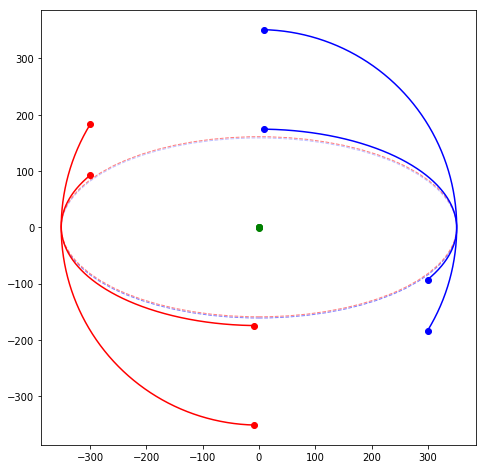

In [18]:
%matplotlib inline
plotBL.UVellipse(u30,v30,w30,a30,b30,v030)
plotBL.UVellipse(uNCP,vNCP,wNCP,aNCP,bNCP,v0NCP)

**Figure 4.5.4**: 极地基线的uv轨迹，观测的赤纬分别为$\delta=90^\circ$和$\delta=30^\circ$，颜色规则同上图。 $uv$ track for a baseline at the pole observing at $\delta=90^\circ$ (NCP) and at $\delta=30^\circ$ with the same color conventions as the previous figure.

当对赤纬为$\delta$的源进行观测，我们得到的uv轨迹仍然为椭圆形状，且椭圆中心位于(0,0)。对于极地干涉仪来说，由于基线的对称性，只要12小时，就能得到完整的uv轨迹。

When observing a source at declination $\delta$, we still have an elliptical shape but centered at (0,0). In the case of a polar interferometer, the full $uv$ track can be covered in 12 hours only due to the symmetry of the baseline.

##### 4.5.1.2.2 赤道干涉仪 The Equatorial interferometer

另一个极端场景：干涉仪位于赤道上。天赤道穿过当地的天顶，因此$\delta=0^\circ$。从天赤道往下看，基线不会转动，此时投影基线不等于物理基线，这种情况只发生在赤道上。

Let's consider the other extreme scenario: this time, we position the interferometer at the equator. The local zenith is crossed by the Celestial Equator at $\delta=0^\circ$. As seen from the celestial equator, the baseline will not rotate and the projected baseline will no longer correspond to the physical baseline. This configuration is the only case where this happens.

如果$\mathbf{b}$没有转动，我们能由此猜测其$uv$轨迹将是一条直线。

If $\mathbf{b}$ is not rotating, we can intuitively guess that the $uv$ tracks will be straight lines.

In [47]:
L=np.radians(0.) #
X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

# At local zenith == Celestial Equator
dec=np.radians(0.)

uEQ = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)
vEQ = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)
wEQ = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)

# parameters of the UVtrack as an ellipse
aEQ=np.sqrt(X**2+Y**2)/lam # major axis  
bEQ=aEQ*np.sin(dec)              # minor axi
v0EQ=Z/lam*np.cos(dec)     # center of ellipse

# Close to Zenith
dec=np.radians(10.)

u10 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)
v10 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)
w10 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)

a10=np.sqrt(X**2+Y**2)/lam # major axis  
b10=a*np.sin(dec)              # minor axi
v010=Z/lam*np.cos(dec)     # center of ellipse

/Users/denghui/Documents/Work/DEV/fundamentals_of_interferometry_chinese/4_Visibility_Space/plotBL.py:132: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold('on')


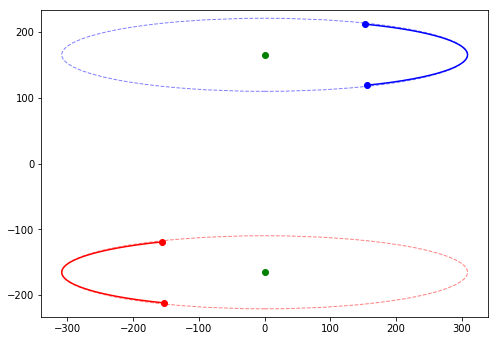

In [20]:
%matplotlib inline
plotBL.UVellipse(u10,v10,w10,a10,b10,v010)
#plotBL.UVellipse(uEQ,vEQ,wEQ,aEQ,bEQ,v0EQ)

**Figure 4.5.5**: 赤道处分别观测$\delta=0^\circ$ 和$\delta=10^\circ$所得到的$uv$覆盖，颜色规则同上图。$uv$ track for a baseline at the equator observing at $\delta=0^\circ$ and at $\delta=10^\circ$, with the same color conventions as the previous figure.

赤道干涉仪观测天顶，会看到射电源呈直线划过天空，因此$uv$点呈直线排列。

An equatorial interferometer observing its zenith will see radio sources crossing the sky on straight, linear paths. Therefore, they will produce straight $uv$ coordinates.

##### 4.5.1.1.3 东-西阵列 The East-West array <a id='vis:sec:ew'></a> <!--\label{vis:sec:ew}-->

东-西阵列是干涉仪的一种特殊情况，其物理基线跟大地参考系的东-西方向对齐，好处在于相应的$uv$轨迹完全处于一个平面上。

The East-West array is the special case of an interferometer with physical baselines aligned with the East-West direction in the ground-based frame of reference. They have the convenient property of giving a $uv$ coverage which lies entirely on a plane.

如果物理基线为东-西方向，则其仰角Elevation $\mathcal{E}$为零，方位角$\mathcal{A}$ 为 $\frac{\pi}{2}$，则 [Eq. 4.5.1 &#10549;](#vis:eq:451)可以简化为：

If the baseline is aligned with the East-West direction, then the Elevation $\mathcal{E}$ of the baseline is zero and the Azimuth $\mathcal{A}$ is $\frac{\pi}{2}$. [Eq. 4.5.1 &#10549;](#vis:eq:451) then simplifies considerably:

$Y$是基线的唯一非零分量。

The only non-zero component of the baseline will be its $Y$-component.

\begin{equation}
\frac{1}{\lambda}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=
|\mathbf{b_\lambda}|
\begin{bmatrix}
\cos L_a \sin 0 - \sin L_a \cos 0 \cos \frac{\pi}{2}\nonumber\\ 
\cos 0 \sin \frac{\pi}{2} \nonumber\\
\sin L_a \sin 0 + \cos L_a \cos 0 \cos \frac{\pi}{2}\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
|\mathbf{b_\lambda}|\\
0 \\
\end{bmatrix}
\end{equation}

以可变时角$H$观测赤纬$\delta_0$的源，得到：

If we observe a source at declination $\delta_0$ with varying Hour Angle, $H$, we obtain:

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
\sin H & \cos H & 0\\ 
-\sin \delta_0 \cos H & \sin\delta_0\sin H & \cos\delta_0\\
\cos \delta_0 \cos H & -\cos\delta_0\sin H & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
0\\
|\mathbf{b_\lambda}| \\
0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \cos H \\ 
|\mathbf{b_\lambda}| \sin\delta_0 \sin H\\
-|\mathbf{b_\lambda}|\cos\delta_0\sin H\\
\end{pmatrix} 
\end{equation}

当$H = 6^\text{h}$ (西)时：

when $H = 6^\text{h}$ (West)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
|\mathbf{b_\lambda}|\sin\delta_0\\
|\mathbf{b_\lambda}|\cos\delta_0\\
\end{pmatrix} 
\end{equation}

当$H = 0^\text{h}$ (南)时：

when $H = 0^\text{h}$ (South)
\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \\ 
0\\
0\\
\end{pmatrix} 
\end{equation}

当$H = -6^\text{h}$ (东)时：

when $H = -6^\text{h}$ (East)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
-|\mathbf{b_\lambda}|\sin\delta_0\\
-|\mathbf{b_\lambda}|\cos\delta_0
\end{pmatrix} 
\end{equation}

此时，我们得到$u$、$v$ 以及 $|\mathbf{b_\lambda}|$ 之间的关系：

In this case, one can notice that we always have a relationship between $u$, $v$ and $|\mathbf{b_\lambda}|$:

$$ u^2+\left( \frac{v}{\sin\delta_0}\right) ^2=|\mathbf{b_\lambda}|^2$$ 

<div class=warn>
<b>提醒:</b> 上式里的$\sin\delta_0$可以解释成一个压缩因子。
</div>

<div class=warn>
<b>Warning:</b> The $\sin\delta_0$ factor, appearing in the previous equation, can be interpreted as a compression factor.
</div>

#### 4.5.1.3  $uv$轨迹的可见度平面采样  Sampling the visibility plane with $uv$-tracks

##### 4.5.1.3.1 模拟基线 Simulating a baseline

如果基线为东西向，上述公式可以进行简化。

When we have an EW baseline, some equations simplify.

首先，$XYZ = [0~d~0]^T$，$d$为以波数为单位的基线长度。

Firstly, $XYZ = [0~d~0]^T$, where $d$ is the baseline length measured in wavelengths.

其次，我们得到以下关系：$u = d\cos(H)$, $v = d\sin(H)\sin(\delta)$，其中 $H$ 为视场中心的时角，$\delta$为赤纬。

Secondly, we have the following relationships: $u = d\cos(H)$, $v = d\sin(H)\sin(\delta)$,

where $H$ is the hour angle of the field center and $\delta$ its declination.

在本节，我们将画出一条东-西方向基线的uv覆盖，其视场中心位于两个不同的位置（赤纬）。

In this section, we will plot the $uv$-coverage of an EW-baseline whose field center is at two different declinations.

In [21]:
H = np.linspace(-6,6,600)*(np.pi/12) #Hour angle in radians
d = 100 #We assume that we have already divided by wavelength

delta = 60*(np.pi/180) #Declination in radians
u_60 = d*np.cos(H)
v_60 = d*np.sin(H)*np.sin(delta)

<span style="background-color:red">TLG:AC: Add the following figures. This is specifically for an EW array. They will add some more insight. </span>
<img src='figures/EW_1_d.svg' width=40%>
<img src='figures/EW_2_d.svg' width=40%>
<img src='figures/EW_3_d.svg' width=40%>

##### 4.5.1.3.2 模拟天空 Simulating the sky

让我们来模拟一个有三个源的天空，它们的赤经($\alpha$)、赤纬($\delta$)以及强度分别为：

Let us populate our sky with three sources, with positions given in RA ($\alpha$) and DEC ($\delta$):
* Source 1: (5h 32m 0.4s,60$^{\circ}$-17' 57'') - 1 Jy
* Source 2: (5h 36m 12.8s,-61$^{\circ}$ 12' 6.9'') - 0.5 Jy
* Source 3: (5h 40m 45.5s,-61$^{\circ}$ 56' 34'') - 0.2 Jy

将视场中心置于$(\alpha_0,\delta_0) = $ (5h 30m,60$^{\circ}$)。

We place the field center at $(\alpha_0,\delta_0) = $ (5h 30m,60$^{\circ}$).  

In [48]:
RA_sources = np.array([5+30.0/60,5+32.0/60+0.4/3600,5+36.0/60+12.8/3600,5+40.0/60+45.5/3600])
DEC_sources = np.array([60,60+17.0/60+57.0/3600,61+12.0/60+6.9/3600,61+56.0/60+34.0/3600])
Flux_sources_labels = np.array(["","1 Jy","0.5 Jy","0.2 Jy"])
Flux_sources = np.array([1,0.5,0.2]) #in Jy
step_size = 200
print("Phase center     Source 1     Source 2     Source3")
print(repr("RA="+str(RA_sources)).ljust(2))
print("DEC="+str(DEC_sources))

Phase center     Source 1     Source 2     Source3
'RA=[5.5        5.53344444 5.60355556 5.67930556]'
DEC=[60.         60.29916667 61.20191667 61.94277778]


($\alpha$,$\delta$)转换到$l,m$ (参看<a href='../3_Positional_Astronomy/3_4_direction_cosine_coordinates.ipynb'> Chapter 3.4 </a>)

We then convert the ($\alpha$,$\delta$) to $l,m$: <span style="background-color:red">TLG:AC:Point to Chapter 3.</span>
* $l = \cos \delta \sin \Delta \alpha$
* $m = \sin \delta\cos\delta_0 -\cos \delta\sin\delta_0\cos\Delta \alpha$
* $\Delta \alpha = \alpha - \alpha_0$

In [49]:
RA_rad = np.array(RA_sources)*(np.pi/12)
DEC_rad = np.array(DEC_sources)*(np.pi/180)
RA_delta_rad = RA_rad-RA_rad[0]

l = np.cos(DEC_rad)*np.sin(RA_delta_rad)
m = (np.sin(DEC_rad)*np.cos(DEC_rad[0])-np.cos(DEC_rad)*np.sin(DEC_rad[0])*np.cos(RA_delta_rad))
print("l=",l*(180/np.pi))
print("m=",m*(180/np.pi))

point_sources = np.zeros((len(RA_sources)-1,3))
point_sources[:,0] = Flux_sources
point_sources[:,1] = l[1:]
point_sources[:,2] = m[1:]

l= [0.         0.24855826 0.74818685 1.26458942]
m= [0.         0.30010768 1.21061225 1.96811494]


用度表示源和相位中心坐标。

The source and phase centre coordinates are now given in degrees.

/Users/denghui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/denghui/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2108: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


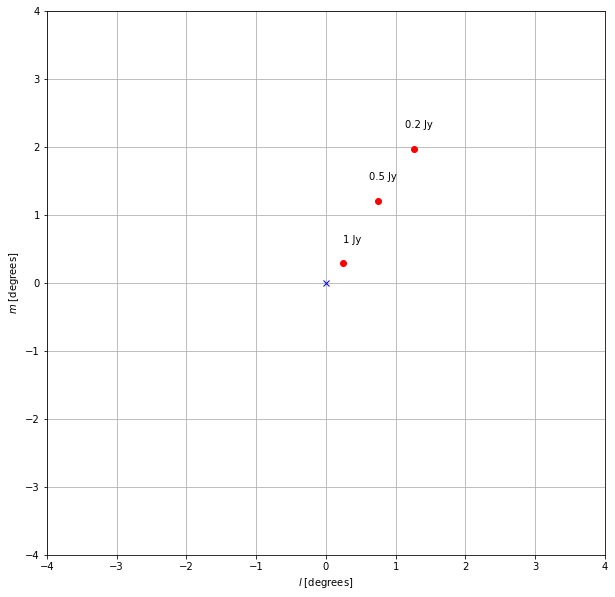

In [50]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel("$l$ [degrees]")
plt.ylabel("$m$ [degrees]")
plt.plot(l[0],m[0],"bx")
plt.hold("on")
plt.plot(l[1:]*(180/np.pi),m[1:]*(180/np.pi),"ro") 
counter = 1
for xy in zip(l[1:]*(180/np.pi)+0.25, m[1:]*(180/np.pi)+0.25):                                              
    ax.annotate(Flux_sources_labels[counter], xy=xy, textcoords='offset points',horizontalalignment='right',
                verticalalignment='bottom')  
    counter = counter + 1
        
plt.grid()

**Figure 4.5.6**: 在$l$,$m$平面上模拟出天空的分布。 Distribution of the simulated sky in the $l$,$m$ plane.

##### 4.5.1.3.3 一次模拟观测 Simulating an observation

接下来生成一个全覆盖$uv$平面，并用前面的东西向基线进行采样。简化起见，我们忽略了$w$项。

We will now create a fully-filled $uv$-plane, and sample it using the EW-baseline track we created in the first section. We will be ignoring the $w$-term for the sake of simplicity.

In [51]:
u = np.linspace(-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10, num=step_size, endpoint=True)
v = np.linspace(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10, num=step_size, endpoint=True)   
uu, vv = np.meshgrid(u, v)
zz = np.zeros(uu.shape).astype(complex)

生成可见度平面矩阵。

We create the dimensions of our visibility plane.

In [52]:
s = point_sources.shape
for counter in range(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    zz += A_i*np.exp(-2*np.pi*1j*(uu*l_i+vv*m_i))
zz = zz[:,::-1]

这里，我们生成的是一个全覆盖的可见度平面，假定有一个“理想”干涉仪，能对整个$uv$平面进行全采样。但在现实中，由于天线数量有限，不可能实现这样的全采样。回想一下之前的知识，天空亮度$I(l,m)$跟可见度$V(u,v)$之间，通过傅立叶变换建立了对应关系。因此，对于多个点源，我们能得到：

We create our fully-filled visibility plane. With a "perfect" interferometer, we could sample the entire $uv$-plane. Since we only have a finite amount of antennas, this is never possible in practice. Recall that our sky brightness $I(l,m)$ is related to our visibilites $V(u,v)$ via the Fourier transform. For a bunch of point sources we can therefore write:

$$V(u,v)=\mathcal{F}\{I(l,m)\} = \mathcal{F}\{\sum_k A_k \delta(l-l_k,m-m_k)\} = \sum_k A_k e^{-2\pi i (ul_i+vm_i)}$$

让我们来计算模拟天空的总可见度。

Let's compute the total visibilities for our simulated sky.

In [53]:
u_track = u_60
v_track = v_60
z = np.zeros(u_track.shape).astype(complex)       

s = point_sources.shape
for counter in range(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    z += A_i*np.exp(-1*2*np.pi*1j*(u_track*l_i+v_track*m_i))

以下是我们根据之前推导出的uv轨迹，即$V(u_t,v_t)$，得到的采样可见度平面。

Below we sample our visibility plane on the $uv$-track derived in the first section, i.e. $V(u_t,v_t)$.

Text(0.5,1,'Imaginary part of visibilities')

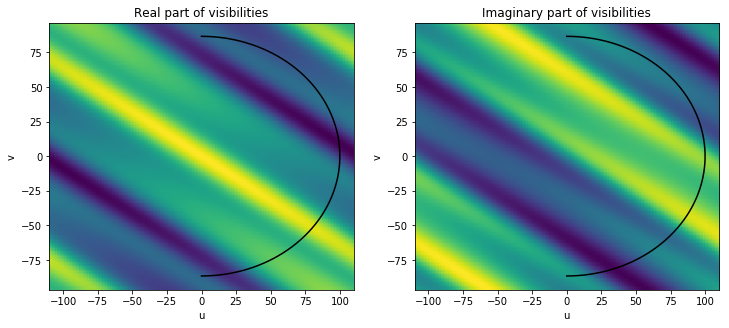

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(zz.real,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, \
                           np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Real part of visibilities")

plt.subplot(122)
plt.imshow(zz.imag,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, \
                           np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Imaginary part of visibilities")

**Figure 4.5.7**: 可见度函数的实部和虚部，黑色曲线是可见度的$uv$轨迹。  Real and imaginary parts of the visibility function. The black curve is the portion of the $uv$ track crossing the visibility.

We now plot the sampled visibilites as a function of time-slots, i.e $V(u_t(t_s),v_t(t_s))$.

Text(0.5,1,'Imag: sampled visibilities')

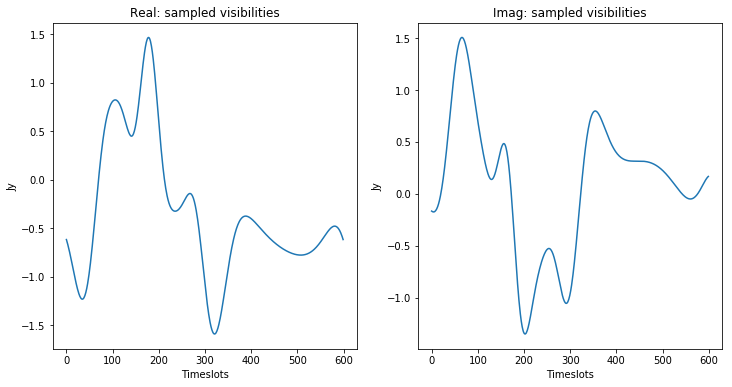

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(z.real)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Real: sampled visibilities")

plt.subplot(122)
plt.plot(z.imag)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Imag: sampled visibilities")

**Figure 4.5.8**: 沿图4.5.7中的黑色曲线所做的可见度采样，左图为实部，右图为虚部，都是时间的函数。Real and imaginary parts of the visibility sampled by the black curve in Fig. 4.5.7, plotted as a function of time.

Text(0.5,1,'Phase of visibilities')

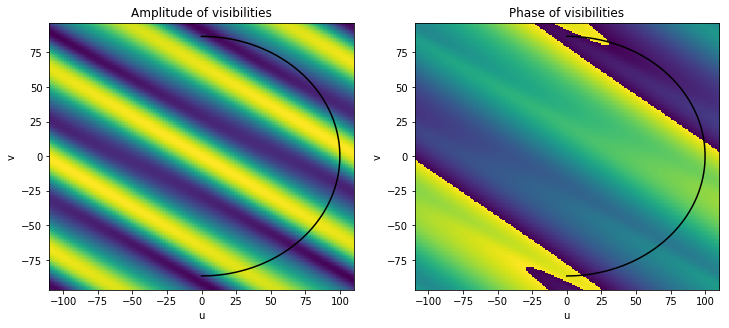

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(abs(zz),
    extent=[-1*(np.amax(np.abs(u_60)))-10,
            np.amax(np.abs(u_60))+10,
            -1*(np.amax(abs(v_60)))-10,
            np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Amplitude of visibilities")

plt.subplot(122)
plt.imshow(np.angle(zz),
    extent=[-1*(np.amax(np.abs(u_60)))-10,
            np.amax(np.abs(u_60))+10,
            -1*(np.amax(abs(v_60)))-10,
            np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Phase of visibilities")

**Figure 4.5.9**: 可见度函数的幅度和相位。黑色曲线为$uv$轨迹。Amplitude and Phase of the visibility function. The black curve is the portion of the $uv$ track crossing the visibility.

Text(0.5,1,'Phase: sampled visibilities')

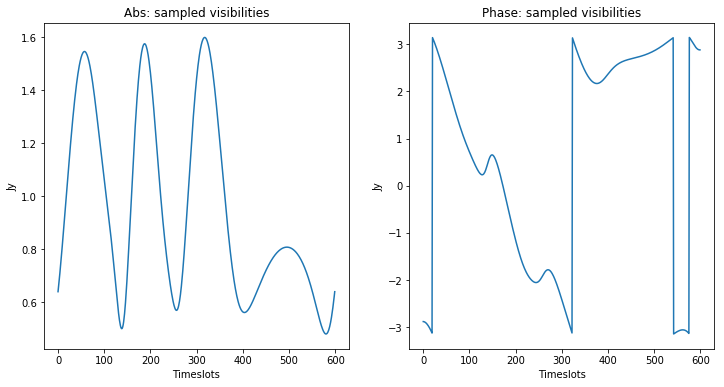

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(abs(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Abs: sampled visibilities")

plt.subplot(122)
plt.plot(np.angle(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Phase: sampled visibilities")

**Figure 4.5.10**: 根据图4.5.7中黑色曲线所做的可见度采样，左图为幅度，右图为相位，都是时间的函数。Amplitude and Phase of the visibility sampled by the black curve in Fig. 4.5.7, plotted as a function of time.

##### 4.5.1.3.4 真实世界的可见度 "Real-life" visibility

下图呈现了不同基线测量的可见度。数据来自于LOFAR对天鹅A([Fig. 4.4.11 &#10549;]所做的一次真实观测，天鹅A是一个很强的射电源。一种颜色对应一条基线，是沿着不同的uv轨迹对同一个可见度函数的不同采样。

In the following figure, we present a collection of visibility measurements taken with different baselines, as a function of time. These measurements come from a real LOFAR dataset observing Cygnus A ([Fig. 4.4.11 &#10549;](#vis:fig:4411)), a powerful radiosource.
Each color corresponds to a different baseline measurement, and consequently, a different sampling of the same visibility function along different uv-track.

<a id="vis:fig:4411"></a> <!---\label{vis:eq:4411}--->
<img src='figures/cygnusA.jpg' width=30%>

**Figure 4.5.11**: 21cm波长的天鹅A。Cygnus A at 21 cm.

<a id="vis:fig:4412"></a> <!---\label{vis:eq:4412}--->
<img src='figures/baselines.jpg' width=70%>

**Figure 4.5.12**: 可见度的幅值随时间的变化。 Visibility amplitude as a function of time.

[Fig. 4.5.12 &#10549;](#vis:fig:4412)给出了天鹅A观测的所有可见度采样的幅值。由于天线数量众多，所以看上去很复杂，难以理解。同时因为源本身很复杂，所以即便是单个可见度的采样（即一条基线的$uv$轨迹）的幅值，也不容易解释。接下来，让我们换种方式，看看可见度的幅值随$uv$-distance（$r_{uv}$）的变化。

[Fig. 4.5.12 &#10549;](#vis:fig:4412) shows a plot of the amplitudes of all the visibility samples from our observation of Cygnus A. The large number of antennas makes its interpretation difficult. Even the inspection of single visibility's amplitude (i.e. a single $uv$ track) is hard to interpret due to the source's intrinsic complexity. Let us see what happens if we  plot the same information as a function of the $uv$-distance, $r_{uv}$.

<a id="vis:fig:4413"></a> <!---\label{vis:eq:4413}--->
<img src='figures/baseline-uvdist.jpg' width=70%>

**Figure 4.5.13**:可见度幅值随 $r_{uv}$的变化。Visibility amplitude as a function of $r_{uv}$.

图[Fig. 4.5.13 &#10549;](#vis:fig:4413)跟图[Fig. 4.5.12 &#10549;](#vis:fig:4412)上的信息本质上相同，不过，图[Fig. 4.5.13 &#10549;](#vis:fig:4413)上展示的是可见度幅值的$r_{uv}$函数。在[$\S$ 4.4 &#10142;](4_4_the_visibility_function.ipynb)我们已经看到了，可见度函数在径向上的幅值变化给我们提供了源的大小信息。对于图 [Fig. 4.5.13 &#10549;](#vis:fig:4413)来说，当可见度幅值变为零，意味着该源的大小被测量了出来。

[Fig. 4.5.13 &#10549;](#vis:fig:4413) display the same information as [Fig. 4.5.12 &#10549;](#vis:fig:4412) this time as a function of $r_{uv}$. It should be quite clear that, as in [$\S$ 4.4 &#10142;](4_4_the_visibility_function.ipynb), we are stacking the radial plots of the visibility function. The interpretation of these radial plots provides us with information about the size of the source. For [Fig. 4.5.13 &#10549;](#vis:fig:4413) in particular, when the amplitude of the visibility goes to zero, one characteristic size of the source has been resolved.

从上面这些图可以看出，基线越多，对可见度函数的采样越充分。在下一节，我们将讨论如何提高uv覆盖。

From these plots, it is clear that the more baselines we have, the better the sampling of the visibility function.
In the next section, we discuss how astronomers improve their $uv$ coverage.

<p class=conclusion>
  <font size=4><b>Important things to remember</b></font>
  <br>
  <br>

&bull; 每条基线沿着各自的$uv$轨迹进行可见度函数的采样。<br>
&bull; $uv$轨迹为椭圆，其椭圆参数取决于纬度和观测赤纬。<br>
&bull; 极地干涉仪的$uv$轨迹为圆形，赤道干涉仪的$uv$轨迹为线型。<br>
&bull; 长时间的多次采样能提高可见度函数采样，从而获得更多的源信息。<br>

&bull; Each individual baseline samples the visibility function along a single $uv$ track.<br>
&bull; The $uv$ tracks are ellipses whose parameters depends on the latitude and declination of observation.<br>
&bull; The polar (resp. equatorial) interferometer gives circular (linear) $uv$ tracks.<br>
&bull; Accumulating samples over time enhances the sampling of the visibility function, thus improving our knowledge of the source.<br>

</p>

***

* Next: [4.5.2 UV Coverage: Improving Your Coverage](4_5_2_uv_coverage_improving_your_coverage.ipynb)

#### Format status:

* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 09/02/2017

<div class=warn><b>Future Additions:</b></div>